### Establishing Baseline Score and Metrics

In [292]:
def model_metrics(y,y_preds):
    #1
    resids = y - y_preds
    resids_mean = np.mean(resids)
    print('The mean of the residuals is %.2f' % resids_mean)
    #2 
    mae = metrics.mean_absolute_error(y , y_preds)
    print('Mean absolute error is %.2f' % mae)
    #3
    sse = sum(resids**2)
    print('The sum squared error is %.2f' % sse)
    #4
    mse = metrics.mean_squared_error(y, y_preds)
    print('The mean squared error is %.2f' % mse)
    #5
    rmse= np.sqrt(mse)
    print('The root mean squared error is %.2f' % rmse)
    #6 
    r2 = metrics.r2_score(y, y_preds)
    print('The r2 score is %.2f' % r2)

In [293]:
train_data['baseline_score'] = train_data['SalePrice'].mean()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [294]:
model_metrics(train_data['SalePrice'], train_data['baseline_score'])

The mean of the residuals is 0.00
Mean absolute error is 58160.69
The sum squared error is 12674156202626.38
The mean squared error is 6255753308.31
The root mean squared error is 79093.32
The r2 score is 0.00


In [295]:
model_metrics(np.log(train_data['SalePrice']), train_data['baseline_score'])

The mean of the residuals is -180891.84
Mean absolute error is 180891.84
The sum squared error is 66294485676518.13
The mean squared error is 32721858675.48
The root mean squared error is 180891.84
The r2 score is -193746360665.37


## Linear Regression Modeling

Instantiate the model

In [296]:
lr = LinearRegression()

In [297]:
X = train_data[possible_predictors]
y = train_data['SalePrice']

In [298]:
X_train, x_test, y_train, y_test = train_test_split(X, y, random_state=23)

In [299]:
model1 = lr.fit(X_train, y_train)

Cross validation score

In [300]:
cross_val_score(model1, X_train, y_train, cv=5).mean()

0.7138648142569272

In [301]:
cross_val_score(model1, x_test, y_test, cv=5).mean()

0.7936534155828431

R2 determinant

In [302]:
y_train_preds = model1.predict(X_train)

In [303]:
y_test_preds = model1.predict(x_test)

In [304]:
metrics.r2_score(y_train, y_train_preds)

0.7454482764914387

In [305]:
metrics.r2_score(y_test, y_test_preds)

0.7917349249392661

Other metrics:

In [306]:
model_metrics(y_train, y_train_preds)

The mean of the residuals is -0.00
Mean absolute error is 26329.14
The sum squared error is 2369386951335.84
The mean squared error is 1559833411.02
The root mean squared error is 39494.73
The r2 score is 0.75


In [307]:
resids = y_train-y_train_preds

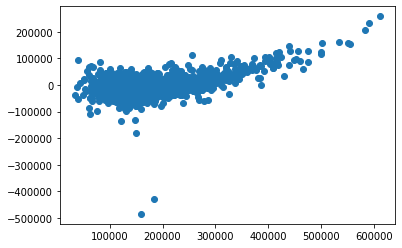

In [308]:
plt.scatter(y_train, resids);

In [309]:
model_metrics(y_test, y_test_preds)

The mean of the residuals is 2261.75
Mean absolute error is 25176.68
The sum squared error is 699001463878.73
The mean squared error is 1378701112.19
The root mean squared error is 37130.86
The r2 score is 0.79


### Refining model

In [310]:
possible_predictors2 = [i for i in possible_predictors]

In [311]:
possible_predictors2.append('Mas Vnr Area')
possible_predictors2.append('2nd Flr SF')
possible_predictors2.append('Garage Area')

In [312]:
possible_predictors2

['Overall Qual',
 'Total Bsmt SF',
 '1st Flr SF',
 'Gr Liv Area',
 'Mas Vnr Area',
 '2nd Flr SF',
 'Garage Area']

In [313]:
possible_predictors2[4]='Mas Vnr Area'

In [314]:
X2 = train_data[possible_predictors2]

In [315]:
X2_train, x2_test, y2_train, y2_test = train_test_split(X2, y, random_state=32)

In [316]:
model2 = lr.fit(X2_train,y2_train)

In [317]:
cross_val_score(model2, X2_train, y2_train, cv=5).mean()

0.7328068027096838

In [318]:
cross_val_score(model2, x2_test, y2_test, cv=5).mean()

0.8256223765599863

In [319]:
y2_train_preds = model2.predict(X2_train)

In [320]:
y2_test_preds = model2.predict(x2_test)

In [321]:
resids2_train = y2_train - y2_train_preds

In [322]:
resids2_test = y2_test - y2_test_preds

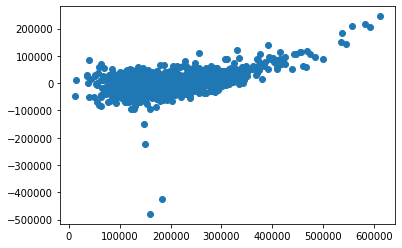

In [323]:
plt.scatter(y2_train, resids2_train);

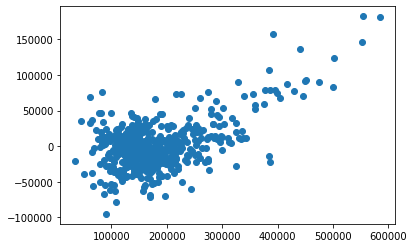

In [324]:
plt.scatter(y2_test, resids2_test);

In [325]:
model_metrics(y2_train, y2_train_preds)

The mean of the residuals is -0.00
Mean absolute error is 24473.45
The sum squared error is 2161256100555.35
The mean squared error is 1422815076.07
The root mean squared error is 37720.22
The r2 score is 0.77


In [326]:
model_metrics(y2_test, y2_test_preds)

The mean of the residuals is 1645.93
Mean absolute error is 24328.06
The sum squared error is 598916981152.08
The mean squared error is 1181295820.81
The root mean squared error is 34369.98
The r2 score is 0.83


### Attempting log transformation

In [327]:
y2 = np.log(train_data['SalePrice'])

In [328]:
X3_train, x3_test, y3_train, y3_test = train_test_split(X2, y2, random_state=32)

In [329]:
model3 = lr.fit(X3_train, y3_train)

In [330]:
y3_train_preds = model3.predict(X3_train)

In [331]:
resids3_train = y3_train - y3_train_preds

In [332]:
y3_test_preds = model3.predict(x3_test)

In [333]:
resids3_test = y3_test - y3_test_preds

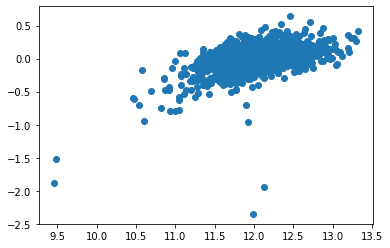

In [334]:
plt.scatter(y3_train, resids3_train);

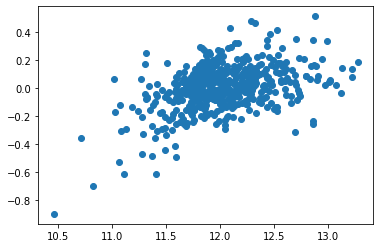

In [335]:
plt.scatter(y3_test, resids3_test);

In [700]:
model_metrics(np.exp(y3_train), np.exp(y3_train_preds))

The mean of the residuals is 2162.08
Mean absolute error is 23134.07
The sum squared error is 4932055733726.90
The mean squared error is 3246909633.79
The root mean squared error is 56981.66
The r2 score is 0.47


In [699]:
model_metrics(y3_train, y3_train_preds)

The mean of the residuals is -0.00
Mean absolute error is 0.13
The sum squared error is 58.43
The mean squared error is 0.04
The root mean squared error is 0.20
The r2 score is 0.77


In [695]:
model_metrics(np.exp(y3_test), np.exp(y3_test_preds))

The mean of the residuals is 3705.32
Mean absolute error is 21031.67
The sum squared error is 436984876364.43
The mean squared error is 861903109.20
The root mean squared error is 29358.19
The r2 score is 0.87


## Modeling Fiting after 2nd EDA

In [382]:
model4_features = possible_predictors2 + features_added

In [383]:
model4_features

['Overall Qual',
 'Total Bsmt SF',
 '1st Flr SF',
 'Gr Liv Area',
 'Mas Vnr Area',
 '2nd Flr SF',
 'Garage Area',
 'paved',
 'new or con',
 'Central Air',
 'Electrical',
 'Kitchen Qual']

In [384]:
train_data_m4 = combined[combined['split']=='Train']

In [385]:
test_data_m4 = combined[combined['split']=='Test']

In [419]:
test_data_m4.to_csv('datasets/cleaned_test.csv', index=False)

In [388]:
type(train_data_m4[model4_features])

pandas.core.frame.DataFrame

In [389]:
x4_train, x4_test, y4_train, y4_test = train_test_split(train_data_m4[model4_features], train_data_m4['SalePrice'], random_state=40)

In [386]:
m4_mlr=LinearRegression()

In [407]:
model4 = m4_mlr.fit(x4_train, np.log(y4_train))

In [408]:
model4_train_preds = m4_mlr.predict(x4_train)

In [409]:
m4_train_resids = np.log(y4_train) - model4_train_preds

In [410]:
model4_test_preds = m4_mlr.predict(x4_test)

In [411]:
m4_test_resids = np.log(y4_test) - model4_test_preds

In [412]:
model_metrics(np.log(y4_train), model4_train_preds)

The mean of the residuals is 0.00
Mean absolute error is 0.11
The sum squared error is 43.68
The mean squared error is 0.03
The root mean squared error is 0.17
The r2 score is 0.83


In [413]:
model_metrics(np.log(y4_test), model4_test_preds)

The mean of the residuals is -0.00
Mean absolute error is 0.11
The sum squared error is 16.82
The mean squared error is 0.03
The root mean squared error is 0.18
The r2 score is 0.79


### Using all training data

In [520]:
m6_mlr = LinearRegression()

In [529]:
m6 = m6_mlr.fit(train_data_m4[model4_features], np.log(train_data_m4['SalePrice']))

In [530]:
m6_preds = m6.predict(train_data_m4[model4_features])

In [531]:
m6_test_preds = m6.predict(test4[test_predictors])

In [561]:
model_metrics(np.log(train_data_m4['SalePrice']), m6_preds)

The mean of the residuals is 0.00
Mean absolute error is 0.11
The sum squared error is 59.81
The mean squared error is 0.03
The root mean squared error is 0.17
The r2 score is 0.83


## Lasso

In [442]:
train_data_m5 = train_data_m4.select_dtypes(exclude='object')

In [476]:
y5 = train_data_m5['SalePrice']

In [551]:
X5 = train_data_m5.drop(columns=['SalePrice', 'Id','PID'])

In [552]:
x5_train, x5_test, y5_train, y5_test = train_test_split(X5, y5, random_state=40)

In [553]:
sc = StandardScaler()
Z_train = sc.fit_transform(x5_train)
Z_test = sc.transform(x5_test)

In [554]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3,1,100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(
alphas=l_alphas,
cv=5)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y5_train);

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1345740981.9709473, tolerance: 761368216.2098874
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1316185116.7248535, tolerance: 761368216.2098874
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1029106795.5731201, tolerance: 801277407.8931751
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You m

In [555]:
lasso_cv.score(Z_train, y5_train)

0.8882408274688072

In [556]:
lasso_cv.score(Z_test, y5_test)

0.7193051930296137

In [557]:
lasso_preds = lasso_cv.predict(Z_test)

In [558]:
lasso_resids = y5_test - lasso_preds

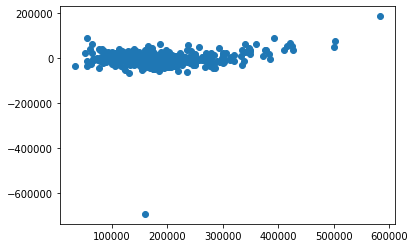

In [559]:
plt.scatter(y5_test, lasso_resids);

In [560]:
X5.columns

Index(['index', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating QC', 'Central Air', 'Electrical',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC',
       'Fence', 'Misc Val', 'Mo Sold', 'Yr Sold', 'paved', 'new or con'],


In [535]:
lasso_cv.coef_

array([  -966.60553124, -12009.35453654,    320.453942  ,  -4899.76091231,
        -5284.3522325 ,   7785.24436911,  -1604.7302194 ,    720.76229759,
        -1439.60472847,  15340.49566454,   6953.70580541,   7477.33086113,
        -1079.07435745,   4363.31511923,   7072.14565273,   -344.08716727,
         4825.20508675,  -7222.75153815,   3967.76548428,    341.33371691,
         9935.46914337,    479.98291861,   1381.02165341,     -0.        ,
         7117.31071297,   1957.81290931,  -1341.65952336,  -1331.35070616,
        11990.78998868,  14348.06102358,    879.21410752,  10155.22816212,
         1790.68904599,  -2251.56596936,    456.05399641,   -505.2373164 ,
        -2316.47595121,  -1188.49903572,   6744.03163981,   1103.47189331,
         3759.67771026,   1931.87656675,   1606.67974834,   1257.53959561,
         -728.28991231,   1558.4075933 ,   3520.26885358,   2241.4719374 ,
        -3479.55646039,  -2978.05077584,   2064.28573702,   -649.71315178,
          648.99050008,  

#### Kaggle Submission

In [420]:
test4 = pd.read_csv('datasets/cleaned_test.csv')

In [421]:
test4['Id']

0      2658
1      2718
2      2414
3      1989
4       625
       ... 
873    1662
874    1234
875    1373
876    1672
877    1939
Name: Id, Length: 878, dtype: int64

In [422]:
to_submit = pd.DataFrame()

In [423]:
test_predictors = model4_features
test_predictors

['Overall Qual',
 'Total Bsmt SF',
 '1st Flr SF',
 'Gr Liv Area',
 'Mas Vnr Area',
 '2nd Flr SF',
 'Garage Area',
 'paved',
 'new or con',
 'Central Air',
 'Electrical',
 'Kitchen Qual']

In [426]:
to_submit['Id'] = test4['Id']
m4_preds = m4_mlr.predict(test4[test_predictors])
to_submit['SalePrice'] = np.exp(m4_preds)

In [427]:
to_submit.head()

,Id,SalePrice
0,2658,128918.606545
1,2718,193070.956128
2,2414,187216.864766
3,1989,111977.310034
4,625,167672.281462


In [428]:
to_submit.to_csv('./datasets/to_submit.csv', index=False)

### Model 7

In [598]:
model7_features = ['Overall Qual',
 'Total Bsmt SF',
 '1st Flr SF',
 'Gr Liv Area',
 'Mas Vnr Area',
 '2nd Flr SF',
 'Garage Area',
 'paved',
 'new or con',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
'Neighborhood Codes']

In [608]:
train_data_7 = combined[combined['split']=='Train']

In [625]:
test_data_7 = combined[combined['split']=='Test']

In [610]:
x7_train, x7_test, y7_train, y7_test = train_test_split(train_data_7[model7_features],train_data_7['SalePrice'],random_state=40)

In [611]:
m7_mlr=LinearRegression()

In [617]:
m7_mlr.fit(x7_train, np.log(y7_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [618]:
m7_train_preds = m7_mlr.predict(x7_train)

In [687]:
model_metrics(np.log(y7_train), m7_train_preds)

The mean of the residuals is 1661.16
Mean absolute error is 18751.95
The sum squared error is 1080373772481.95
The mean squared error is 711708677.52
The root mean squared error is 26677.87
The r2 score is 0.89


In [621]:
m7_test_preds = m7_mlr.predict(x7_test)

In [622]:
model_metrics(np.log(y7_test), m7_test_preds)

The mean of the residuals is 0.01
Mean absolute error is 0.10
The sum squared error is 8.41
The mean squared error is 0.02
The root mean squared error is 0.13
The r2 score is 0.88


In [626]:
test_data_7.to_csv('datasets/cleaned_test2.csv', index=False)

In [627]:
to_submit3 = pd.DataFrame()

In [628]:
test7=pd.read_csv('datasets/cleaned_test2.csv')

In [629]:
test7

,index,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,split,paved,new or con,Neighborhood Codes
0,0,2658,902301120,190,RM,69.000000,9142,Pave,Grvl,3,...,NaN,0,4,2006,WD,NaN,Test,1,0,1.0
1,1,2718,905108090,90,RL,5303.702244,9662,Pave,NaN,2,...,NaN,0,8,2006,WD,NaN,Test,1,0,1.0
2,2,2414,528218130,60,RL,58.000000,17104,Pave,NaN,2,...,NaN,0,9,2006,New,NaN,Test,1,1,1.5
3,3,1989,902207150,30,RM,60.000000,8520,Pave,NaN,3,...,NaN,0,7,2007,WD,NaN,Test,0,0,1.0
4,4,625,535105100,20,RL,5214.763166,9500,Pave,NaN,2,...,NaN,0,7,2009,WD,NaN,Test,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,873,1662,527377110,60,RL,80.000000,8000,Pave,NaN,3,...,NaN,0,11,2007,WD,NaN,Test,1,0,1.5
874,874,1234,535126140,60,RL,90.000000,14670,Pave,NaN,3,...,NaN,0,8,2008,WD,NaN,Test,1,0,1.0
875,875,1373,904100040,20,RL,55.000000,8250,Pave,NaN,3,...,NaN,0,8,2008,WD,NaN,Test,1,0,1.0
876,876,1672,527425140,20,RL,60.000000,9000,Pave,NaN,3,...,NaN,0,5,2007,WD,NaN,Test,1,0,1.0


#### Kaggle Submission

In [630]:
to_submit3['Id'] = test7['Id']
m7_preds = m7_mlr.predict(test7[model7_features])
to_submit3['SalePrice'] = np.exp(m7_preds)

In [631]:
to_submit3

,Id,SalePrice
0,2658,126737.979931
1,2718,196129.760939
2,2414,187699.350853
3,1989,106992.343312
4,625,162725.454731
...,...,...
873,1662,185178.016611
874,1234,189548.522678
875,1373,129990.321067
876,1672,108736.302791


In [632]:
to_submit3.to_csv('./datasets/to_submit3.csv', index=False)